# Downloading and visualising OpenStreetMap data
OSM is a global collaborative (crowd-sourced) dataset and project that aims at creating a free editable map of the world containing a lot of information about our environment. It contains data for example about streets, buildings, different services, and landuse to mention a few.

Used as background maps to visualizations, for routing, geocoding, education, and research (after natural disasters and for fostering economic development).

In [1]:
# Import necessary modules
# Note that osmnx QT library xcb plugin conflicts with the default Ubuntu 16.04 xcb.
# Unset LD_LIBRARY_PATH so that Python does not find the system one.
import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Specify a place name
placeName = "Kamppi, Helsinki, Finland"

# Fetch a graph object
graph = ox.graph_from_place(placeName)
type(graph)

# The MultiDiGraph object stores nodes and/or edges with metadata

networkx.classes.multidigraph.MultiDiGraph

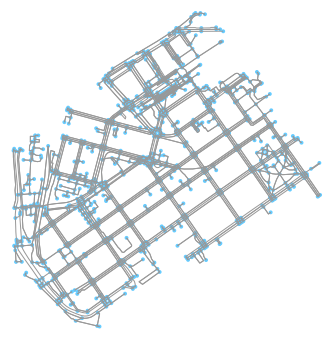

In [3]:
# The MultiDiGraph object stores nodes and/or edges with metadata

# Plot the graph
# Blue points = nodes
# Grey lines = edges
fig, ax = ox.plot_graph(graph)
plt.tight_layout()

In [4]:
# Download a boundary shape into a GeoDataFrame
area = ox.gdf_from_place(placeName)
area.head()

,bbox_east,bbox_north,bbox_south,bbox_west,geometry,place_name
0,24.943453,60.172145,60.160474,24.920742,"POLYGON ((24.9207417 60.1669034, 24.9207454 60...","Kamppi, Eteläinen suurpiiri, Helsinki, Helsing..."


In [5]:
# And download the buildings shapes into a GeoDataFrame
buildings = ox.buildings_from_place(placeName)
buildings.head()

,access,addr:city,addr:country,addr:floor,addr:housename,addr:housenumber,addr:postcode,addr:street,alt_name,alt_name:en,...,tomb,tourism,url,was:building,was:guard:operator,website,wheelchair,wheelchair:description,wikidata,wikipedia
8035238,NaN,Helsinki,FI,NaN,NaN,22-24,NaN,Mannerheimintie,NaN,NaN,...,NaN,NaN,http://www.lasipalatsi.fi/,NaN,NaN,NaN,NaN,NaN,Q630304,fi:Lasipalatsi
8042297,NaN,Helsinki,FI,NaN,NaN,2,00100,Runeberginkatu,NaN,NaN,...,NaN,hotel,http://www.radissonblu.fi,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14797169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14797170,NaN,Helsinki,FI,NaN,NaN,10,00180,Lapinlahdenkatu,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14797171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


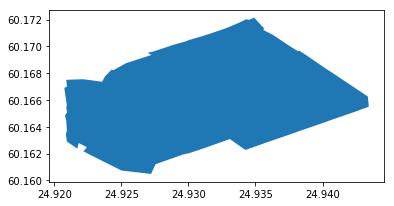

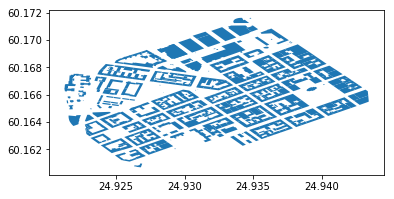

In [6]:
# Plot the area and buildings
area.plot()
buildings.plot()

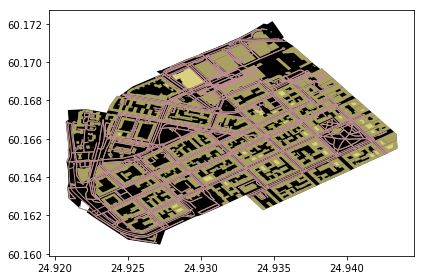

In [7]:
# To plot the streets, we need to extract the edges from the MultiDiGraph into a GeoDataFrame Object
nodes, edges = ox.graph_to_gdfs(graph)

# Plot everything on one figure
fig, ax = plt.subplots()
area.plot(ax=ax, facecolor='black')
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)
plt.tight_layout()